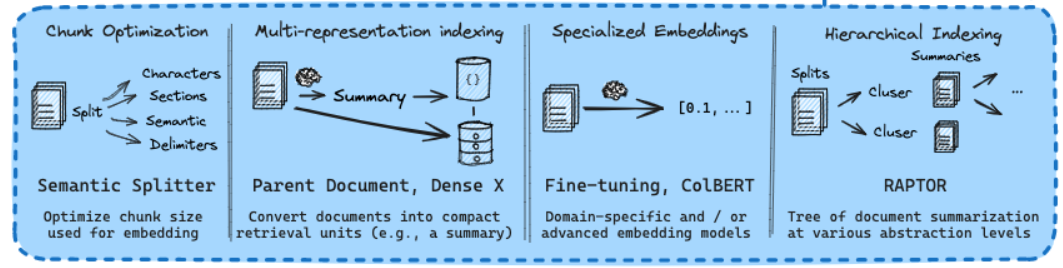

#### **1. Chunking**

In [4]:
import os
from langchain_groq import ChatGroq
from langchain.document_loaders import WebBaseLoader
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from dotenv import load_dotenv
load_dotenv()

USER_AGENT environment variable not set, consider setting it to identify your requests.


True

In [3]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = os.getenv("HUGGINGFACEHUB_API_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [5]:
web_loader = WebBaseLoader(web_path="https://medium.com/@raja.gupta20/generative-ai-for-beginners-part-1-introduction-to-ai-eadb5a71f07d")
document = web_loader.load()

##### **1.1 Fixed size chunking**

**Description:** Splits text into chunks of a predefined size, either by tokens or characters.

**Implementation:**
1. Token-Based Splitting: Utilizes the TokenTextSplitter to divide text based on token count.
2. Character-Based Splitting: Employs the CharacterTextSplitter for splitting based on character count.

In [8]:
# Token Based Splitting
from langchain.text_splitter import TokenTextSplitter

text_splitter = TokenTextSplitter(
    chunk_size = 1000, # Number of tokens per chunk
    chunk_overlap = 0
)

chunks = text_splitter.split_documents(document)
chunks

[Document(metadata={'source': 'https://medium.com/@raja.gupta20/generative-ai-for-beginners-part-1-introduction-to-ai-eadb5a71f07d', 'title': 'Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | Medium', 'description': 'Introduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the…', 'language': 'en'}, page_content='Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | MediumOpen in appSign upSign inWriteSign upSign inGenerative AI for Beginners: Part 1 — Introduction to AIRaja Gupta·Follow13 min read·Feb 8, 2024--54ListenShareIntroductionIntroduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the rapid popularity of ChatGPT. Now-a-days, AI and especially Generative AI became

In [14]:
# Character Based Splitting
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=1000,  
    chunk_overlap=0
)
chunks = text_splitter.split_documents(document)
chunks

Created a chunk of size 18368, which is longer than the specified 1000


[Document(metadata={'source': 'https://medium.com/@raja.gupta20/generative-ai-for-beginners-part-1-introduction-to-ai-eadb5a71f07d', 'title': 'Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | Medium', 'description': 'Introduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the…', 'language': 'en'}, page_content='Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | MediumOpen in appSign upSign inWriteSign upSign inGenerative AI for Beginners: Part 1 — Introduction to AIRaja Gupta·Follow13 min read·Feb 8, 2024--54ListenShareIntroductionIntroduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the rapid popularity of ChatGPT. Now-a-days, AI and especially Generative AI became

##### **1.2 Recursive Chunking**

Recursively splits text by prioritizing larger structures first (e.g., paragraphs), then smaller ones (e.g., sentences), to maintain semantic integrity.

In [18]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 0
)

# chunks = text_splitter.split_text(document[0].page_content)
chunks = text_splitter.split_documents(document)

chunks

[Document(metadata={'source': 'https://medium.com/@raja.gupta20/generative-ai-for-beginners-part-1-introduction-to-ai-eadb5a71f07d', 'title': 'Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | Medium', 'description': 'Introduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the…', 'language': 'en'}, page_content='Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | MediumOpen in appSign upSign inWriteSign upSign inGenerative AI for Beginners: Part 1 — Introduction to AIRaja Gupta·Follow13 min read·Feb 8, 2024--54ListenShareIntroductionIntroduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the rapid popularity of ChatGPT. Now-a-days, AI and especially Generative AI became

##### **1.3 Sliding Window Chunking**

In [24]:
from langchain.text_splitter import TokenTextSplitter

text_splitter = TokenTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)


chunks = text_splitter.split_documents(document)
chunks

[Document(metadata={'source': 'https://medium.com/@raja.gupta20/generative-ai-for-beginners-part-1-introduction-to-ai-eadb5a71f07d', 'title': 'Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | Medium', 'description': 'Introduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the…', 'language': 'en'}, page_content='Generative AI for Beginners: Part 1 — Introduction to AI | by Raja Gupta | MediumOpen in appSign upSign inWriteSign upSign inGenerative AI for Beginners: Part 1 — Introduction to AIRaja Gupta·Follow13 min read·Feb 8, 2024--54ListenShareIntroductionIntroduced in 1956, the term “Artificial Intelligence (AI)” has been known to all of us. Still, the use and discussion of AI was mostly limited to scientific research or fictional movies until the rapid popularity of ChatGPT. Now-a-days, AI and especially Generative AI became